# Analyse des Données Cyclistic pour Optimiser les Adhésions Annuelles

## Importation des données

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'

In [3]:
# Définir le répertoire des fichiers CSV
#directory = 'chemin/vers/vos/fichiers'
csv_files = [f for f in os.listdir("D:/02_Projects/00_Github/Cyclist Data Analysis/raw data") if f.endswith('.csv')]

# Importer et fusionner les fichiers
df_list = []
for file in csv_files:
    file_path = os.path.join("D:/02_Projects/00_Github/Cyclist Data Analysis/raw data", file)
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)
df = pd.concat(df_list, ignore_index=True)


In [4]:
# Explorer les données
print(f"La base contient {df.shape[0]} lignes et {df.shape[1]} colonnes")

La base contient 6151137 lignes et 13 colonnes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151137 entries, 0 to 6151136
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.1+ MB


In [6]:
# Aperçu des premières lignes de df
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  C1D650626C8C899A  electric_bike  2024-01-12 15:30:27  2024-01-12 15:37:59   
1  EECD38BDB25BFCB0  electric_bike  2024-01-08 15:45:46  2024-01-08 15:52:59   
2  F4A9CE78061F17F7  electric_bike  2024-01-27 12:27:19  2024-01-27 12:35:19   
3  0A0D9E15EE50B171   classic_bike  2024-01-29 16:26:17  2024-01-29 16:56:06   
4  33FFC9805E3EFF9A   classic_bike  2024-01-31 05:43:23  2024-01-31 06:09:35   

           start_station_name start_station_id           end_station_name  \
0           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
1           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
2           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
3      Wells St & Randolph St     TA1305000030  Larrabee St & Webster Ave   
4  Lincoln Ave & Waveland Ave            13253   Kingsbury St & Kinzie St   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  
0   KA1503000043  41.903267 -87.634737  41.889177 -87.638506        member  
1   KA1503000043  41.902937 -87.634440  41.889177 -87.638506        member  
2   KA1503000043  41.902951 -87.634470  41.889177 -87.638506        member  
3          13193  41.884295 -87.633963  41.921822 -87.644140        member  
4   KA1503000043  41.948797 -87.675278  41.889177 -87.638506        member

## Nettoyage des données

In [7]:
# Vérification des valeurs dupliquées
print(f'Il y a {df.duplicated().sum()} valeurs dupliquées')

Il y a 0 valeurs dupliquées


In [8]:
# Pourcentage de valeurs manquantes par colonne
(df.isna().sum())*100/df.shape[0]

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    18.252414
start_station_id      18.252414
end_station_name      18.792867
end_station_id        18.792867
start_lat              0.000000
start_lng              0.000000
end_lat                0.119490
end_lng                0.119490
member_casual          0.000000
dtype: float64

In [9]:
# Supprimer les columns non relevant
df.drop(columns=['start_station_id', 'end_station_id'], axis = 1, inplace= True)

In [10]:
# Supprimer les lignes contenant des valeurs manquantes
df.dropna( subset= ['end_lat', 'end_lng'], inplace=True)

# Remplir certaines données manquantes
df.fillna('Unknown', inplace = True)

df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [11]:
# /Calculer des colonnes clées
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')
df['ended_at'] = pd.to_datetime(df['ended_at'], format= 'mixed')
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df['day_of_week'] = df['started_at'].dt.day_name()

In [12]:
# Standardize typos
df['member_casual'] = df['member_casual'].str.title()
df['rideable_type'] = df['rideable_type'].str.title()

In [13]:
# Summarizing 'ride_duration'
df["ride_duration"].describe()

count    6.143787e+06
mean     1.523567e+01
std      3.250694e+01
min     -2.748317e+03
25%      5.450000e+00
50%      9.533333e+00
75%      1.691608e+01
max      1.509367e+03
Name: ride_duration, dtype: float64

In [14]:
# Identifier les bornes des valeurs abbérantes
Q1 = df['ride_duration'].quantile(0.25)
Q3 = df['ride_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
print(f'Toutes les valeurs en dessous de {lower_bound} sont considérées comme abbérantes')

upper_bound = Q3 + 1.5 * IQR
print(f'\nToutes les valeurs au dessus de {upper_bound} sont considérées comme abbérantes')

outliers = df[(df['ride_duration'] < lower_bound) | (df['ride_duration'] > upper_bound)]
print(f'\nLa base contient {len(outliers)} potentielles valeurs abbérantes. \nCe qui nous donne donc environ {len(outliers)*100/len(df):.2f}% de valeurs abbérantes')

Toutes les valeurs en dessous de -11.749125000000003 sont considérées comme abbérantes

Toutes les valeurs au dessus de 34.115208333333335 sont considérées comme abbérantes

La base contient 459753 potentielles valeurs abbérantes. 
Ce qui nous donne donc environ 7.48% de valeurs abbérantes


In [15]:
# Filtrer les durées de trajet négatives
df = df[(df['ride_duration'] > 0)]

# Vérifications 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6143064 entries, 0 to 6151136
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       object        
 11  ride_duration       float64       
 12  day_of_week         object        
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 656.2+ MB
None


In [16]:
# Save data
df.to_csv('cyclistic_cleaned.csv', index=False)

## Analyse des données

### Analyses descriptives

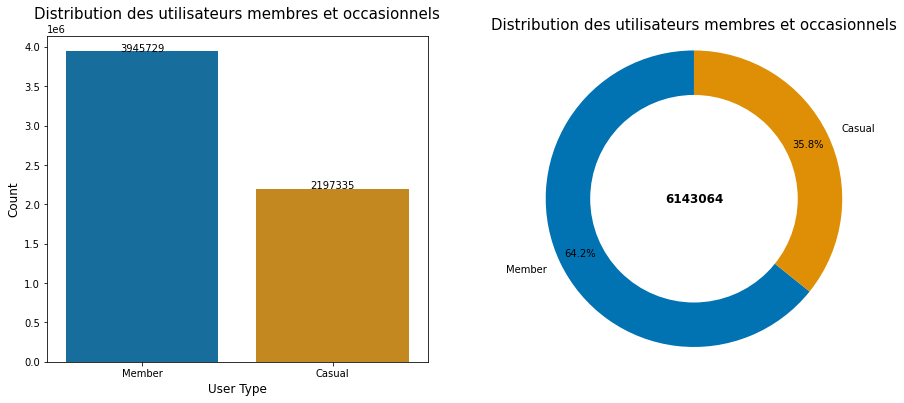

In [17]:
# Calcule du nombre total d'utilisateurs de vélos
total_riders = len(df)

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
sns.countplot(x='member_casual', data=df, palette=sns.color_palette("colorblind"), ax=ax[0])
ax[0].set_title('Distribution des utilisateurs membres et occasionnels', fontsize=15)
ax[0].set_xlabel('User Type', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Add count annotations to the top of the bars
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height + 0.1,
            '{:1.0f}'.format(height), ha="center") 

# Calculate the proportions of casual and member users
user_counts = df['member_casual'].value_counts()

# Donut chart
patches, texts, autotexts = ax[1].pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette("colorblind"))

# Draw the center of the pie to create a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax[1].axis('equal')  

# Add the total number of records in the center
label = plt.text(0,0, total_riders, horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')

ax[1].set_title(f'Distribution des utilisateurs membres et occasionnels', fontsize=15)

plt.show()

Environ 65% des utilisateurs sont des membres contre 35%  d'utilisateurs

### Quels sont les volumes de trajets par type d’utilisateur (membres vs occasionnels) sur une base quotidienne, hebdomadaire et mensuelle ?

In [18]:
# Préparation des données
df['date'] = df['started_at'].dt.date
df['year'] = df['started_at'].dt.year
df['week'] = df['started_at'].dt.isocalendar().week
df['month'] = df['started_at'].dt.to_period('M')

In [19]:
# Calculer les volumes de trajets
daily_trips = df.groupby(['date', 'member_casual']).size().reset_index(name='trip_count')
weekly_trips = df.groupby(['year', 'week', 'member_casual']).size().reset_index(name='trip_count')
weekly_trips['year_week'] = weekly_trips['year'].astype(str) + '-W' + weekly_trips['week'].astype(str)
monthly_trips = df.groupby(['month', 'member_casual']).size().reset_index(name='trip_count')
monthly_trips['month'] = monthly_trips['month'].astype(str)

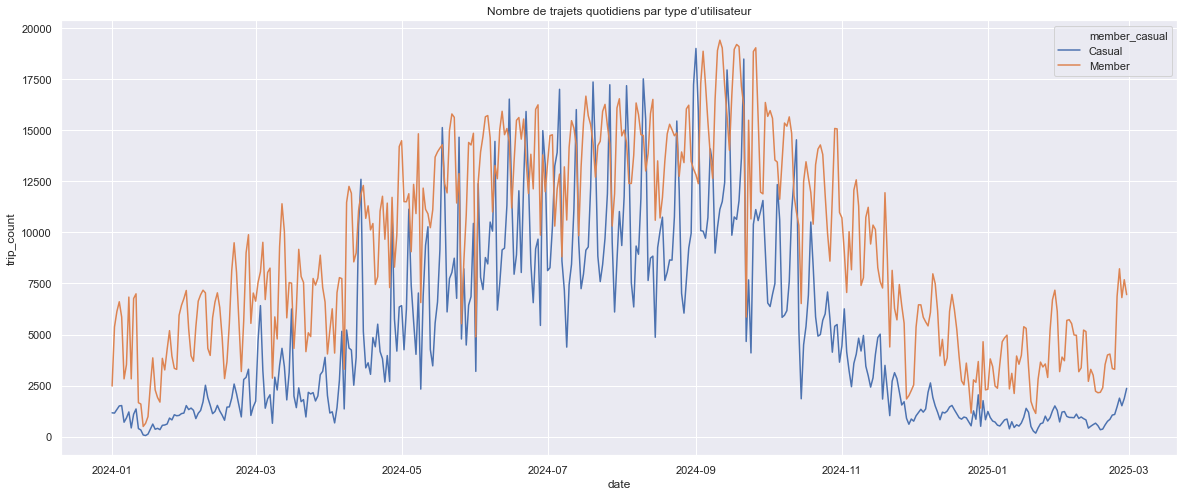

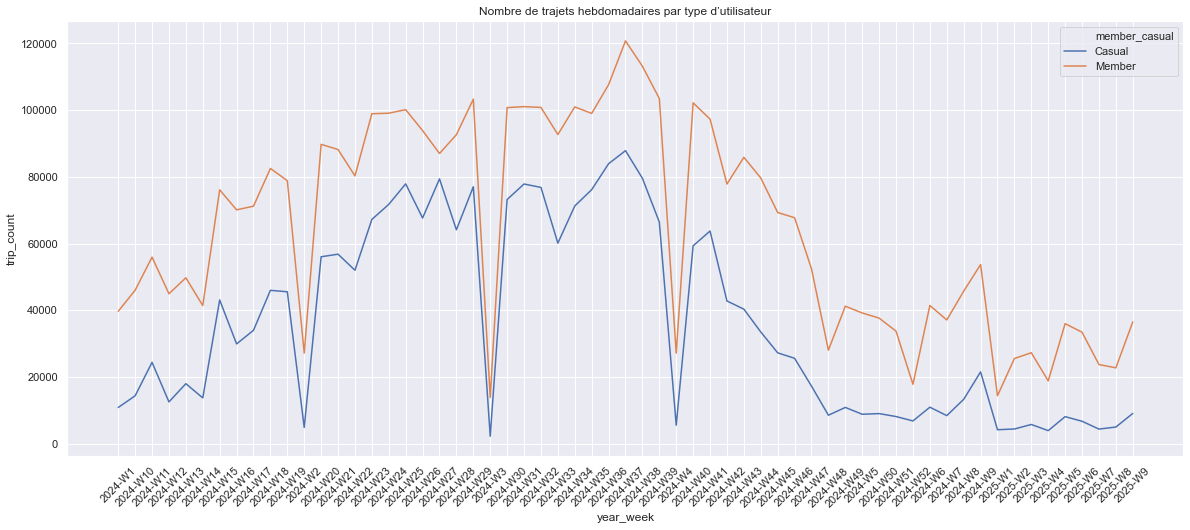

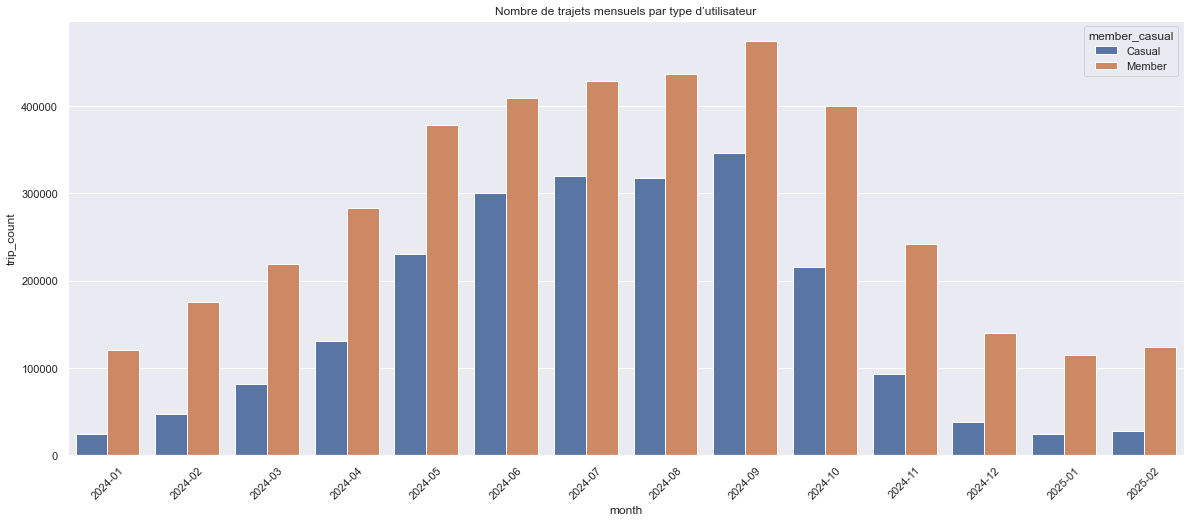

In [20]:


# Visualisations 

sns.set(rc = {'figure.figsize':(20,8)})

sns.lineplot(data=daily_trips, x='date', y='trip_count', hue='member_casual')
plt.title('Nombre de trajets quotidiens par type d’utilisateur')
plt.show()

sns.lineplot(data=weekly_trips, x='year_week', y='trip_count', hue='member_casual')
plt.title('Nombre de trajets hebdomadaires par type d’utilisateur')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data=monthly_trips, x='month', y='trip_count', hue='member_casual')
plt.title('Nombre de trajets mensuels par type d’utilisateur')
plt.xticks(rotation=45)
plt.show()

 Dans l'ensemble, le nombre de trajets effectués par les membres est systématiquement et continuellement supérieure à celui éffectué par les occasionnels.

De mai à septembre (en été), le nombre de trajets augmentent aussi bien chez les membres que chez les occasionnels, atteignant leur pic exactement durant la première semaine de septembre 2024

Ces volumes montrent que la fréquence d'utilisation des vélos aussi bien par les membres que par les occasionnels et sporadique et sensible aux saisons, offrant des opportunités pour des campagnes ciblées.

### Quelle est la durée moyenne des trajets pour les membres et les occasionnels, et comment varie-t-elle selon le jour de la semaine ? 

In [21]:
# Calculer la durée moyenne par type d'utilisateur
average_ride_duration = df.groupby('member_casual')['ride_duration'].mean().reset_index()
average_ride_duration.columns = ['member_casual', 'avg_ride_duration']
print(average_ride_duration)

  member_casual  avg_ride_duration
0        Casual          20.897906
1        Member          12.087284


Membres : ~12 min, Occasionnels : ~21 min. Les occasionnels font des trajets beaucoup plus longs.

In [22]:
# Calculer la durée moyenne par jour
ride_duration_by_day = df.groupby(['day_of_week', 'member_casual'])['ride_duration'].mean().reset_index()
ride_duration_by_day.columns = ['day_of_week', 'member_casual', 'avg_ride_duration']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ride_duration_by_day['day_of_week'] = pd.Categorical(ride_duration_by_day['day_of_week'], categories=day_order, ordered=True)
ride_duration_by_day = ride_duration_by_day.sort_values('day_of_week')
print(ride_duration_by_day)

   day_of_week member_casual  avg_ride_duration
2       Monday        Casual          20.240151
3       Monday        Member          11.561632
10     Tuesday        Casual          18.005552
11     Tuesday        Member          11.608313
12   Wednesday        Casual          18.402977
13   Wednesday        Member          11.792416
8     Thursday        Casual          18.133807
9     Thursday        Member          11.590350
0       Friday        Casual          20.184337
1       Friday        Member          11.796706
4     Saturday        Casual          23.759435
5     Saturday        Member          13.392892
6       Sunday        Casual          24.219676
7       Sunday        Member          13.435234


Membres : 11-14 min, stable. Occasionnels : 18-24 min, hausse le week-end.

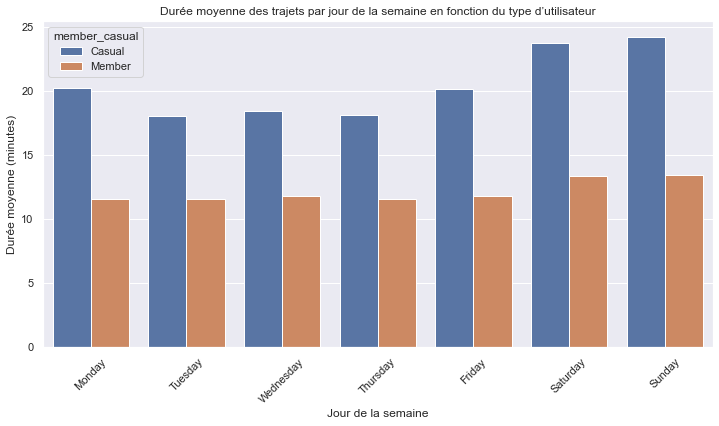

In [23]:
# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(data=ride_duration_by_day, x='day_of_week', y='avg_ride_duration', hue='member_casual')
plt.title('Durée moyenne des trajets par jour de la semaine en fonction du type d’utilisateur')
plt.xlabel('Jour de la semaine')
plt.ylabel('Durée moyenne (minutes)')
plt.xticks(rotation=45)
plt.show()

En moyenne, les membres font contamment chaque jour de la semainedes trajets d'environ 12 min. Les occasionnels quant à eux font des trajets plus longs avec pic samedi/dimanche (~25 min).

- Les membres ont des trajets courts et réguliers (12 min en moyenne), avec peu de variation selon le jour.
- Les occasionnels ont des trajets beaucoup plus longs (19 min en moyenne), avec une augmentation le week-end (jusqu’à 24 min), reflétant des usages distincts.

### Quelles stations de départ et d’arrivée sont les plus populaires pour chaque type d’utilisateur ? 

In [24]:
# Exclude "Other" and "Missing" from the data
filtered_data = df[~df['start_station_name'].isin(['Other', 'Unknown'])]

# Calculer le nombre de trajets par station de départ et type d'utilisateur
start_stations = filtered_data.groupby(['start_station_name', 'member_casual']).size().reset_index(name='trip_count')

# Trier et sélectionner le top 10 pour chaque type d'utilisateur
top_start_stations = start_stations.groupby('member_casual').apply(lambda x: x.nlargest(10, 'trip_count')).reset_index(drop=True)
print(top_start_stations)

                    start_station_name member_casual  trip_count
0              Streeter Dr & Grand Ave        Casual       51278
1    DuSable Lake Shore Dr & Monroe St        Casual       34342
2                Michigan Ave & Oak St        Casual       25243
3   DuSable Lake Shore Dr & North Blvd        Casual       23118
4                      Millennium Park        Casual       22753
5                       Shedd Aquarium        Casual       21357
6                       Dusable Harbor        Casual       18566
7                  Theater on the Lake        Casual       16828
8                Michigan Ave & 8th St        Casual       13618
9                    Adler Planetarium        Casual       13017
10            Kingsbury St & Kinzie St        Member       32586
11        Clinton St & Washington Blvd        Member       30133
12             Clinton St & Madison St        Member       27031
13                   Clark St & Elm St        Member       26538
14           Clinton St &

In [25]:
# Exclude "Other" and "Missing" from the data
filtered_data = df[~df['end_station_name'].isin(['Other', 'Unknown'])]

# Calculer le nombre de trajets par station d’arrivée et type d'utilisateur
end_stations = filtered_data.groupby(['end_station_name', 'member_casual']).size().reset_index(name='trip_count')

# Trier et sélectionner le top 10 pour chaque type d'utilisateur
top_end_stations = end_stations.groupby('member_casual').apply(lambda x: x.nlargest(10, 'trip_count')).reset_index(drop=True)
print(top_end_stations)

                      end_station_name member_casual  trip_count
0              Streeter Dr & Grand Ave        Casual       55208
1    DuSable Lake Shore Dr & Monroe St        Casual       32213
2   DuSable Lake Shore Dr & North Blvd        Casual       26680
3                Michigan Ave & Oak St        Casual       25962
4                      Millennium Park        Casual       24568
5                       Shedd Aquarium        Casual       19227
6                  Theater on the Lake        Casual       18191
7                       Dusable Harbor        Casual       16865
8                Michigan Ave & 8th St        Casual       12489
9               Wabash Ave & Grand Ave        Casual       11665
10            Kingsbury St & Kinzie St        Member       32768
11        Clinton St & Washington Blvd        Member       30882
12             Clinton St & Madison St        Member       28341
13                   Clark St & Elm St        Member       26457
14           Clinton St &

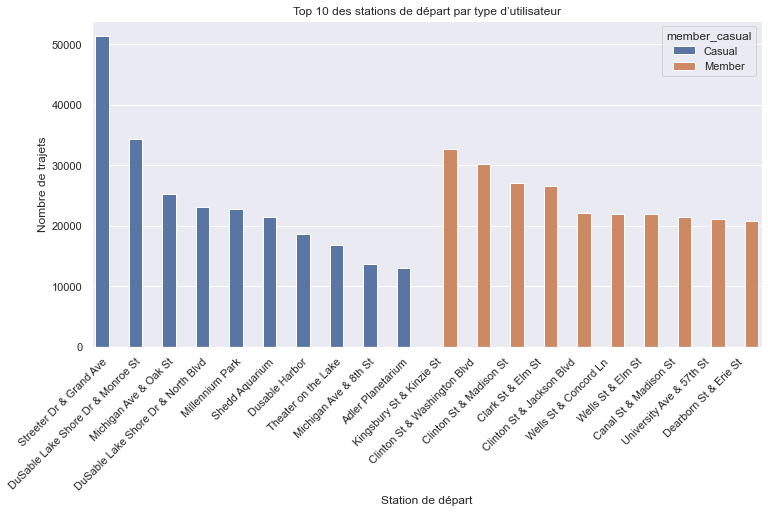

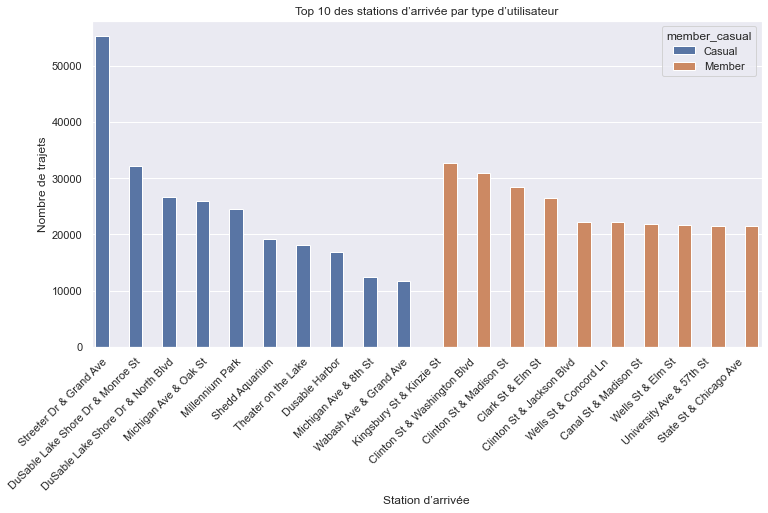

In [26]:
# Graphique : Top stations de départ
plt.figure(figsize=(12, 6))
sns.barplot(data=top_start_stations, x='start_station_name', y='trip_count', hue='member_casual')
plt.title('Top 10 des stations de départ par type d’utilisateur')
plt.xlabel('Station de départ')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation=45, ha='right')
plt.show()

# Graphique : Top stations d’arrivée
plt.figure(figsize=(12, 6))
sns.barplot(data=top_end_stations, x='end_station_name', y='trip_count', hue='member_casual')
plt.title('Top 10 des stations d’arrivée par type d’utilisateur')
plt.xlabel('Station d’arrivée')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation=45, ha='right')
plt.show()

Il semble que les stations de départ et d'arrivée les plus fréquentées accueillent une proportion plus élevée d'utilisateurs occasionnels que d'adhérents. Cela pourrait suggérer que ces lieux populaires sont des lieux touristiques ou des zones d'intérêt pour les usagers occasionnels.

Stations de départ les plus populaires :

- Membres : "Kingsbury St & Kinzie St", "Clinton St & Washington Blvd", "Clinton St & Madison St" .
- Occasionnels : "Streeter Dr & Grand Ave", "DuSable Lake Shore Dr & Monroe St", "Michigan Ave & Oak St".


Stations d’arrivée les plus populaires :

- Membres : "Kingsbury St & Kinzie St" (32 768), "Clinton St & Washington Blvd" (30 882), "Clinton St & Madison St" (28 341) — cohérent avec les départs, trajets utilitaires.
- Occasionnels : "Streeter Dr & Grand Ave" (52 208), "DuSable Lake Shore Dr & Monroe St" (32 213), "DuSable Lake Shore Dr & North Blvd" (26 680).

### Comment les conditions saisonnières (ex. : été vs hiver) affectent-elles la fréquence et la durée des trajets pour chaque groupe ? 

In [27]:
# Extraire le mois
df['month'] = df['started_at'].dt.month

# Définir les saisons (basées sur les mois)
def get_season(month):
    if month in [6, 7, 8]:  # Juin, Juillet, Août
        return 'Été'
    elif month in [12, 1, 2]:  # Décembre, Janvier, Février
        return 'Hiver'
    elif month in [3, 4, 5]:  # Mars, Avril, Mai
        return 'Printemps'
    else:  # Septembre, Octobre, Novembre
        return 'Automne'

df['season'] = df['month'].apply(get_season)

In [28]:
# Fréquence : Nombre de trajets par saison et groupe
trip_frequency = df.groupby(['season', 'member_casual']).size().reset_index(name='trip_count')

# Ordre des saisons pour la lisibilité
season_order = ['Printemps', 'Été', 'Automne', 'Hiver']
trip_frequency['season'] = pd.Categorical(trip_frequency['season'], categories=season_order, ordered=True)
trip_frequency = trip_frequency.sort_values('season')

print(trip_frequency)

      season member_casual  trip_count
4  Printemps        Casual      443947
5  Printemps        Member      880215
6        Été        Casual      937341
7        Été        Member     1274958
0    Automne        Casual      654660
1    Automne        Member     1115953
2      Hiver        Casual      161387
3      Hiver        Member      674603


- Membres :
    - Été : 1 274 958 trajets
    - Hiver : 674 603 trajets
    - Printemps : 880 215 trajets
    - Automne : 1 115 953 trajets

Observation : Les membres maintiennent une fréquence relativement élevée toute l’année, avec une  baisse en hiver (-47 % vs été), probablement due au froid, mais leur usage reste stable.


- Occasionnels :
    - Été : 937 341 trajets
    - Hiver : 161 387 trajets
    - Printemps : 443 947 trajets
    - Automne : 654 660 trajets

Observation : Les occasionnels sont très sensibles aux saisons, avec une chute drastique en hiver (-83 % vs été) et un pic en été. Usage récréatif, fortement lié aux conditions météo favorables

In [29]:
# Durée moyenne par saison et groupe
trip_duration = df.groupby(['season', 'member_casual'])['ride_duration'].mean().reset_index()
trip_duration.columns = ['season', 'member_casual', 'avg_ride_duration']

# Appliquer l’ordre des saisons
trip_duration['season'] = pd.Categorical(trip_duration['season'], categories=season_order, ordered=True)
trip_duration = trip_duration.sort_values('season')

print(trip_duration)

      season member_casual  avg_ride_duration
4  Printemps        Casual          22.414235
5  Printemps        Member          12.165631
6        Été        Casual          22.732196
7        Été        Member          13.139818
0    Automne        Casual          18.730200
1    Automne        Member          11.591742
2      Hiver        Casual          14.866354
3      Hiver        Member          10.815579


La durée reste stable pour les deux groupes d'utilisateurs, avec peu de variations saisonnières.

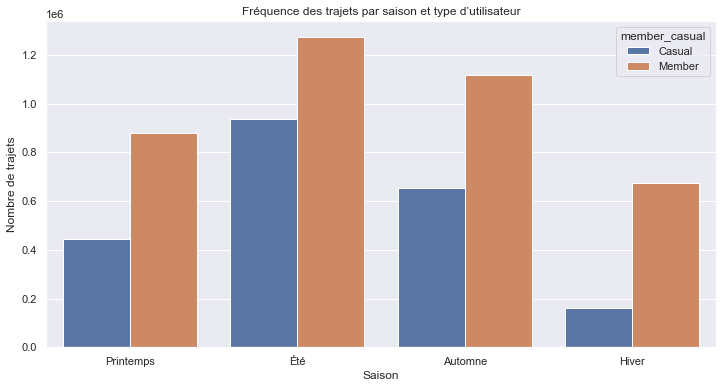

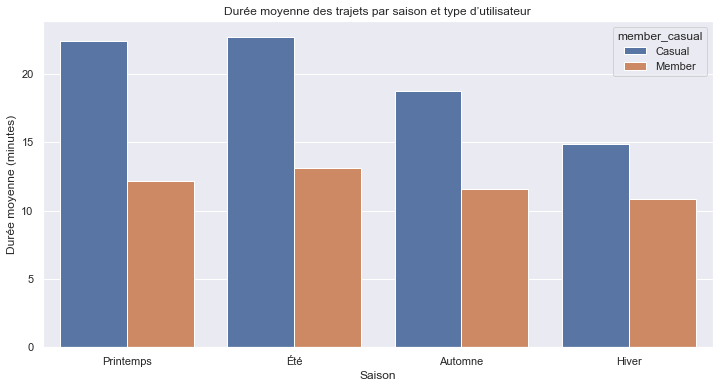

In [30]:
# Graphique : Fréquence par saison
plt.figure(figsize=(12, 6))
sns.barplot(data=trip_frequency, x='season', y='trip_count', hue='member_casual')
plt.title('Fréquence des trajets par saison et type d’utilisateur')
plt.xlabel('Saison')
plt.ylabel('Nombre de trajets')
plt.show()

# Graphique : Durée moyenne par saison
plt.figure(figsize=(12, 6))
sns.barplot(data=trip_duration, x='season', y='avg_ride_duration', hue='member_casual')
plt.title('Durée moyenne des trajets par saison et type d’utilisateur')
plt.xlabel('Saison')
plt.ylabel('Durée moyenne (minutes)')
plt.show()

Les membres sont peu sensibles aux saisons (usage utilitaire), tandis que les occasionnels réduisent fréquence et durée en hiver et augmentent en été (probablement pour les loisirs).

### Quels sont les trajets les plus fréquents (station A à station B) pour les membres par rapport aux occasionnels ? 

In [31]:
# Exclude  "Missing" from the data
filtered_data = df[(~df['end_station_name'].isin(['Other', 'Unknown'])) & (~df['start_station_name'].isin(['Other', 'Unknown']))]

In [32]:
# Calculer le nombre de trajets par combinaison de stations et type d'utilisateur
trips_by_route = filtered_data.groupby(['start_station_name', 'end_station_name', 'member_casual']).size().reset_index(name='trip_count')

# Sélectionner les 10 trajets les plus fréquents pour chaque groupe
top_trips = trips_by_route.groupby('member_casual').apply(lambda x: x.nlargest(10, 'trip_count')).reset_index(drop=True)

print(top_trips)

                   start_station_name                   end_station_name  \
0             Streeter Dr & Grand Ave            Streeter Dr & Grand Ave   
1   DuSable Lake Shore Dr & Monroe St  DuSable Lake Shore Dr & Monroe St   
2   DuSable Lake Shore Dr & Monroe St            Streeter Dr & Grand Ave   
3               Michigan Ave & Oak St              Michigan Ave & Oak St   
4                     Millennium Park                    Millennium Park   
5                      Dusable Harbor                     Dusable Harbor   
6             Streeter Dr & Grand Ave  DuSable Lake Shore Dr & Monroe St   
7                      Shedd Aquarium            Streeter Dr & Grand Ave   
8                      Dusable Harbor            Streeter Dr & Grand Ave   
9                     Montrose Harbor                    Montrose Harbor   
10                 State St & 33rd St              Calumet Ave & 33rd St   
11              Calumet Ave & 33rd St                 State St & 33rd St   
12          

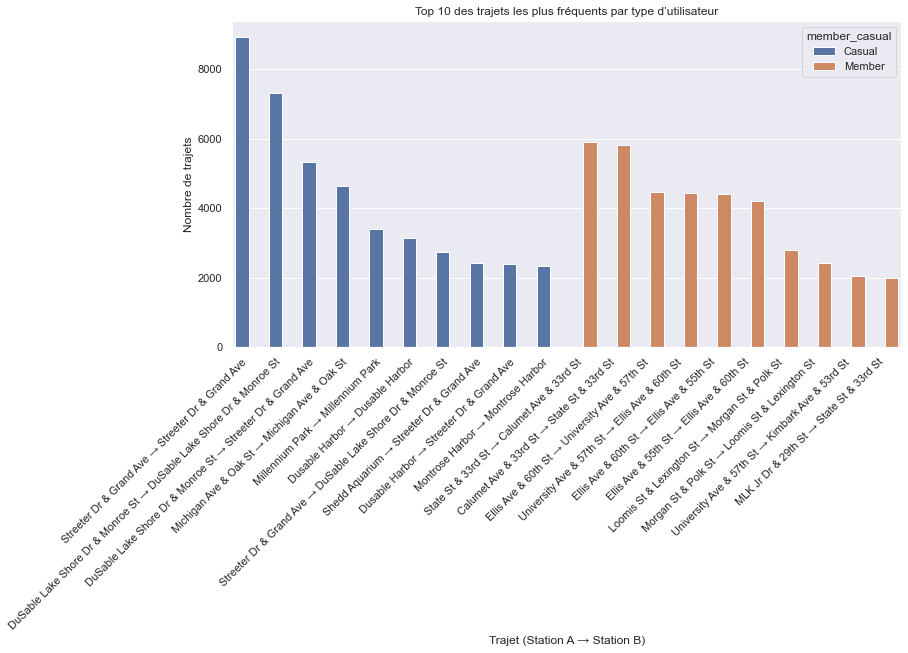

In [33]:
# Créer une colonne combinée pour les trajets
top_trips['route'] = top_trips['start_station_name'] + ' → ' + top_trips['end_station_name']

# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=top_trips, x='route', y='trip_count', hue='member_casual')
plt.title('Top 10 des trajets les plus fréquents par type d’utilisateur')
plt.xlabel('Trajet (Station A → Station B)')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation=45, ha='right')
plt.show()

- Trajets les plus fréquents pour les membres :

    - "State St & 33rd St" → "Calumet Ave & 33rd St" (5 897 trajets)
    - "Calumet Ave & 33rd St" → "State St & 33rd St" (5 807 trajets)
    - "Ellis Ave & 60th St" → "University Ave & 57th St" (4 454 trajets)

Observation : Ces trajets sont situés près de zones de bureaux ou zone universitaires.


- Trajets les plus fréquents pour les occasionnels :

    - "Streeter Dr & Grand Ave" → "Streeter Dr & Grand Ave" (8 928 trajets)
    - "DuSable Lake Shore Dr & Monroe St" → "DuSable Lake Shore Dr & Monroe St" (7 318 trajets)
    - "DuSable Lake Shore Dr & Monroe St" → "Streeter Dr & Grand Ave" (5 328 trajets)

Observation : Ces trajets sont bidirectionnels et relient des points touristiques, reflétant une utilisation récréative.


Comparaison : Les membres privilégient des trajets utilitaires réguliers entre stations professionnelles ou universitaires, tandis que les occasionnels favorisent des parcours touristiques entre attractions.

### Quelle est la répartition des trajets par heure de la journée pour les membres et les occasionnels ? 

In [34]:
# Extraire les heures (0-23)
df['hour'] = df['started_at'].dt.hour

# Compter les trajets par heure et par type d'utilisateur
trips_by_hour = df.groupby(['hour', 'member_casual']).size().reset_index(name='trip_count')
top_hours_trips = trips_by_hour.groupby('member_casual').apply(lambda x: x.nlargest(10, 'trip_count')).reset_index(drop=True)
print(top_hours_trips)

    hour member_casual  trip_count
0     17        Casual      208501
1     16        Casual      195931
2     18        Casual      176772
3     15        Casual      173954
4     14        Casual      157854
5     13        Casual      151319
6     12        Casual      145127
7     19        Casual      130106
8     11        Casual      122841
9     10        Casual       96434
10    17        Member      418280
11    16        Member      366854
12    18        Member      323871
13     8        Member      274586
14    15        Member      268187
15    19        Member      226231
16    14        Member      218063
17    12        Member      218056
18    13        Member      217874
19     7        Member      215363


- Membres :
    - 17h : 418 280 trajets
    - 16h : 366 854 trajets
    - 18h : 323 871 trajets
    - 8h : 274 586 trajets

Observation : Les pics à 8h et 17h suggèrent des trajets liés aux heures de bureau (aller et retour au travail), avec une activité modérée à 15h.


- Occasionnels :
    - 17h : 208 501 trajets
    - 16h : 195 931 trajets
    - 18h : 176 772 trajets
    - 15h : 173 954 trajets

Observation : Une répartition plus étalée, avec un pic l’après-midi (15h-18h), typique des activités de loisir ou tourisme.

In [35]:
import plotly.express as px
def format_hour(h: int):
    h = str(h)
    if len(h) == 1: 
        h = '0'+h
    h = h+ ":00"
    return h


# Group by hour and user type, and count the number of rides
hourly = df.groupby(['hour', 'member_casual'])['start_station_name'].count().reset_index()
hourly.columns =['Hour of Day',"User Type","Number of Rides"]
hourly['Hour of Day'] = hourly['Hour of Day'].apply(format_hour)

fig = px.line_polar(
    data_frame=hourly,
    r = 'Number of Rides',
    theta='Hour of Day',
    color='User Type',
    line_close=True,
    color_discrete_sequence=['crimson', 'royalblue'],
)

fig.update_layout(
    title="Répartition des trajets par heure de la journée", 
    template="seaborn",
    title_x=0.5,
    height=900,
)

fig.show()

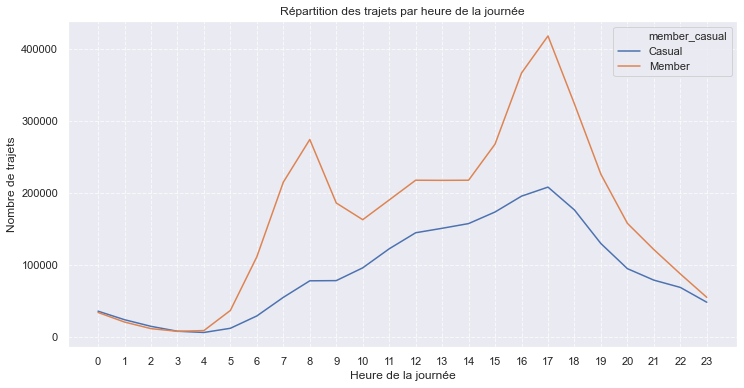

In [36]:
# Graphique
plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_by_hour, x='hour', y='trip_count', hue='member_casual')
plt.title('Répartition des trajets par heure de la journée')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de trajets')
plt.xticks(range(0, 24))  # Afficher toutes les heures
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- Membres : La courbe montre deux pics nets à 8h (208 646) et 17h (312 314), avec une baisse la nuit. Cela reflète un usage concentré sur les trajets domicile-travail.

- Occasionnels : La courbe est plus plate, avec une montée progressive de 6h à 17h (150 369), puis une baisse graduelle. Cela indique une utilisation récréative, plus active l’après-midi.

Les membres ont une répartition bimodale (matin/soir), tandis que les occasionnels montrent une courbe plus uniforme avec un pic l’après-midi, reflétant leurs usages distincts.

### Quels segments d’occasionnels (ex. : longs trajets le week-end, utilisateurs fréquents en été) présentent le plus grand potentiel de conversion en membres ? 

In [37]:
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)

# Filtrer les occasionnels avec longs trajets le week-end
long_weekend_trips = df[(df['member_casual'] == 'Casual') & 
                        (df['is_weekend']) & 
                        (df['ride_duration'] > 30)]

# Compter les trajets par jour
long_weekend_summary = long_weekend_trips.groupby(['date', 'start_station_name']).size().reset_index(name='trip_count')
long_weekend_total = long_weekend_trips['ride_id'].nunique()

print(f"Nombre total de trajets occasionnels >30 min le week-end : {long_weekend_total}")

Nombre total de trajets occasionnels >30 min le week-end : 175040


Ces occasionnels utilisent les vélos pour des balades longues le week-end (ex. : tourisme), un segment potentiellement convertible s’ils valorisent cet usage régulier.

In [38]:
# Filtrer les occasionnels en été
summer_trips = df[(df['member_casual'] == 'Casual') & (df['season'] == 'Été')]

# Compter les trajets par station et date
summer_freq = summer_trips.groupby(['date', 'start_station_name']).size().reset_index(name='trip_count')
summer_high_freq = summer_freq[summer_freq['trip_count'] > 5]  # Plus de 5 trajets/jour = fréquent
summer_total = summer_trips['ride_id'].nunique()

print(f"Nombre total de trajets occasionnels en été : {summer_total}")
print(f"Nombre de cas de haute fréquence (>5 trajets/jour) : {summer_high_freq.shape[0]}")

Nombre total de trajets occasionnels en été : 937341
Nombre de cas de haute fréquence (>5 trajets/jour) : 30323


Ces 30 323 occasionnels utilisent les vélos fréquemment en été, un comportement proche des membres, indiquant un fort potentiel de conversion.

In [39]:
# Membres : trajets par jour et station
member_trips = df[df['member_casual'] == 'Member']
member_freq = member_trips.groupby(['date', 'start_station_name']).size().reset_index(name='trip_count')
member_high_freq = member_freq[member_freq['trip_count'] > 5]

print(f"Nombre de cas de haute fréquence (>5 trajets/jour) pour membres : {member_high_freq.shape[0]}")

Nombre de cas de haute fréquence (>5 trajets/jour) pour membres : 135707


Les membres ont une fréquence quotidienne élevée, un modèle que les occasionnels fréquents en été pourraient adopter.

### Les membres et les occasionnels préfèrent-ils différents types de vélos (classique, électrique) ?

In [40]:
# Compter les trajets par type de vélo et groupe
bike_usage = df.groupby(['rideable_type', 'member_casual']).size().reset_index(name='trip_count')

# Calculer le pourcentage par groupe
bike_usage['total_by_group'] = bike_usage.groupby('member_casual')['trip_count'].transform('sum')
bike_usage['percentage'] = (bike_usage['trip_count'] / bike_usage['total_by_group']) * 100

print(bike_usage)

      rideable_type member_casual  trip_count  total_by_group  percentage
0      Classic_Bike        Casual      983004         2197335   44.736192
1      Classic_Bike        Member     1847578         3945729   46.824757
2     Electric_Bike        Casual     1129116         2197335   51.385701
3     Electric_Bike        Member     2039029         3945729   51.676864
4  Electric_Scooter        Casual       85215         2197335    3.878107
5  Electric_Scooter        Member       59122         3945729    1.498380


Les deux groupes de clients ont les mêmes préférences en matière de type de vélos

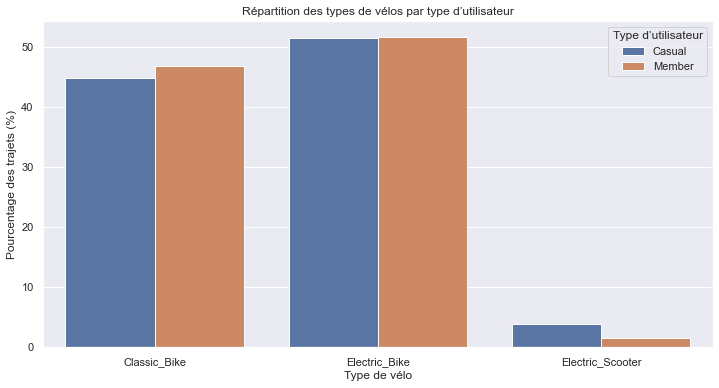

In [41]:
# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=bike_usage, x='rideable_type', y='percentage', hue='member_casual')
plt.title('Répartition des types de vélos par type d’utilisateur')
plt.xlabel('Type de vélo')
plt.ylabel('Pourcentage des trajets (%)')
plt.legend(title='Type d’utilisateur')
plt.show()

In [42]:
# Durée moyenne par type de vélo
bike_duration = df.groupby(['rideable_type', 'member_casual'])['ride_duration'].mean().reset_index()
print(bike_duration)

      rideable_type member_casual  ride_duration
0      Classic_Bike        Casual      29.195179
1      Classic_Bike        Member      13.328361
2     Electric_Bike        Casual      14.350568
3     Electric_Bike        Member      11.074299
4  Electric_Scooter        Casual      11.937651
5  Electric_Scooter        Member       8.239676


Les occasionnels utilisent les vélos classiques pour des trajets plus longs.

Conclusion: Les membres et les occasionnels ne préfèrent pas différents types de vélos.

### Quelle est la distance moyenne des trajets pour chaque groupe, et comment varie-t-elle selon les conditions saisonnières ?

In [43]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

In [ ]:
df['distance_km'] = df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']) 
                             if pd.notnull(row['start_lat']) and pd.notnull(row['end_lat']) else 0, axis=1)

distances = df.groupby(['season', 'member_casual'])['distance_km'].mean().reset_index()
season_order = ['Printemps', 'Été', 'Automne', 'Hiver']
distances['season'] = pd.Categorical(distances['season'], categories=season_order, ordered=True)
distances = distances.sort_values('season')

print(distances)

In [ ]:

df.groupby('member_casual')['distance_km'].mean().reset_index()

member_casual  distance_km
0        Casual     2.103195
1        Member     2.153727

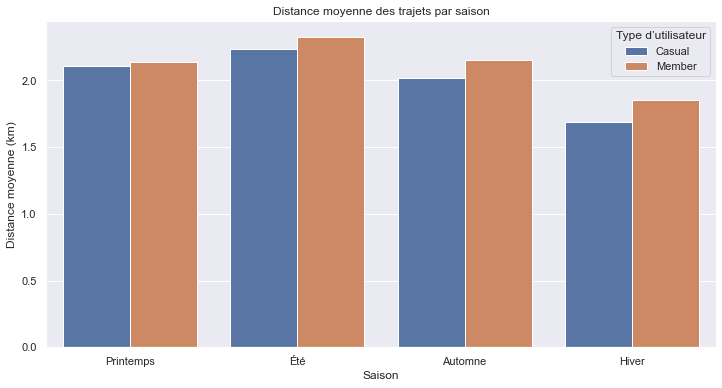

In [ ]:
# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(data=distances, x='season', y='distance_km', hue='member_casual')
plt.title('Distance moyenne des trajets par saison')
plt.xlabel('Saison')
plt.ylabel('Distance moyenne (km)')
plt.legend(title='Type d’utilisateur')
plt.show()

### Quels sont les schémas de déplacement géographique (ex. : trajets aller-retour vs boucles) pour les membres et les occasionnels ?

  member_casual  trip_count  total_by_group  percentage   pattern
0        Casual     1806305         2197335   82.204352  Linéaire
1        Casual      391030         2197335   17.795648    Boucle
2        Member     3545743         3945729   89.862811  Linéaire
3        Member      399986         3945729   10.137189    Boucle


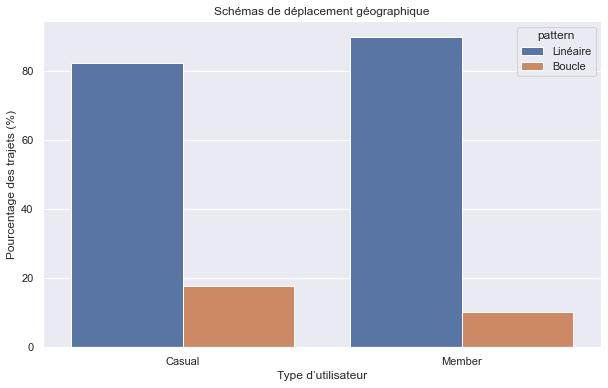

In [ ]:
# Calcul pour un petit dataset 
df['start_station_name'] = df['start_station_name'].fillna('Unknown')
df['end_station_name'] = df['end_station_name'].fillna('Unknown')
df['is_loop'] = df['start_station_name'] == df['end_station_name']
df['distance_km'] = df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']) 
                             if pd.notnull(row['start_lat']) and pd.notnull(row['end_lat']) else 0, axis=1)
df['is_loop'] = df['is_loop'] | (df['distance_km'] < 0.1)

trip_patterns = df.groupby(['member_casual', 'is_loop']).size().reset_index(name='trip_count')
trip_patterns['total_by_group'] = trip_patterns.groupby('member_casual')['trip_count'].transform('sum')
trip_patterns['percentage'] = (trip_patterns['trip_count'] / trip_patterns['total_by_group']) * 100
trip_patterns['pattern'] = trip_patterns['is_loop'].map({True: 'Boucle', False: 'Linéaire'})
trip_patterns = trip_patterns.drop(columns=['is_loop'])

print(trip_patterns)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=trip_patterns, x='member_casual', y='percentage', hue='pattern')
plt.title('Schémas de déplacement géographique')
plt.xlabel('Type d’utilisateur')
plt.ylabel('Pourcentage des trajets (%)')
plt.show()

In [ ]:
import folium
from IPython.display import display  # Pour afficher la carte dans le notebook

# Étape 1 : Calculer les fréquences par station (tous utilisateurs confondus)
# Gérer les valeurs manquantes
df['start_station_name'] = df['start_station_name'].fillna('Unknown')
df['end_station_name'] = df['end_station_name'].fillna('Unknown')

# Fréquence des départs
start_freq = df.groupby(['start_station_name', 'start_lat', 'start_lng']).size().reset_index(name='start_count')
# Fréquence des arrivées
end_freq = df.groupby(['end_station_name', 'end_lat', 'end_lng']).size().reset_index(name='end_count')

# Renommer pour fusionner
start_freq.columns = ['station_name', 'lat', 'lng', 'start_count']
end_freq.columns = ['station_name', 'lat', 'lng', 'end_count']

# Fusionner départs et arrivées
station_freq = pd.merge(start_freq, end_freq, on=['station_name', 'lat', 'lng'], how='outer').fillna(0)
station_freq['total_count'] = station_freq['start_count'] + station_freq['end_count']

# Calculer les coordonnées moyennes
station_freq = station_freq.groupby('station_name').agg({
    'lat': 'mean',
    'lng': 'mean',
    'total_count': 'sum'
}).reset_index()

# Exclure les stations inconnues ou sans coordonnées
station_freq = station_freq[station_freq['station_name'] != 'Unknown']
station_freq = station_freq.dropna(subset=['lat', 'lng'])

print("Fréquences par station :")

# Étape 2 : Créer et afficher la carte globale dans le notebook
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)  # Centré sur Chicago

for idx, row in station_freq.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=min(row['total_count'] / 1000, 50),  # Taille proportionnelle, max 50
        popup=f"{row['station_name']}: {int(row['total_count'])} trajets",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

print("Carte globale :")
display(m)  # Affiche la carte directement dans le notebook


Fréquences par station :
Carte globale :


In [ ]:
import folium

# Remove rows where lat-long data is missing
data_clean = df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

# Create a map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=13)

# Select a subset of the data for the sake of performance
subset = data_clean.sample(500)

# Add points for the start and end locations, and lines connecting them
for idx, row in subset.iterrows():
    start_location = [row['start_lat'], row['start_lng']]
    end_location = [row['end_lat'], row['end_lng']]
    
    folium.CircleMarker(location=start_location, 
                        radius=5,
                        color="blue", 
                        fill=True).add_to(m)
    
    folium.CircleMarker(location=end_location, 
                        radius=5, 
                        color="red", 
                        fill=True).add_to(m)

    folium.PolyLine(locations=[start_location, end_location], 
                    color="green", 
                    weight=2.5, 
                    opacity=0.4).add_to(m)

# Display the map
m